<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01373377/blob/main/A01373377_Actividad6_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciencia y analítica de datos
***Maestria en Inteligencia Artificial Aplicada***

Actividad Semanal 6 Visualizacion de datos

**Alumno: **
Fernando Ivan Ramos Esparza 

**Matrícula: **
A01373377

1) Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna

4) Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

5) Realiza el conteo de las variables categóricas

6) Escala los datos, si consideras necesario

7) Reduce las dimensiones con PCA, si consideras necesario.

* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

* Indica la importancia de las variables en cada componente

8) Elabora los histogramas de los atributos para visualizar su distribución

9) Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

10) Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

## 1- Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
link= "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
data = pd.read_csv(link)

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1] 

## 2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [4]:
X.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [5]:
X.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
dtype: object

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [10]:
X.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
X.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
dtype: bool

## 3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [31]:
#Quitamos las variables categoricas (X)
ndf = X.copy()
ndf.drop("ID",inplace=True, axis=1)
ndf.drop("X2",inplace=True, axis=1)
ndf.drop("X3",inplace=True, axis=1)
ndf.drop("X4",inplace=True, axis=1)
ndf.drop("X5",inplace=True, axis=1)
ndf.drop("X6",inplace=True, axis=1)
ndf.drop("X7",inplace=True, axis=1)
ndf.drop("X8",inplace=True, axis=1)
ndf.drop("X9",inplace=True, axis=1)
ndf.drop("X10",inplace=True, axis=1)
ndf.drop("X11",inplace=True, axis=1)
ndf


,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [33]:
print("Media")
ndf.mean()

Media


X1     167484.322667
X12     51236.862750
X13     49190.734669
X14     47025.350152
X15     43275.652326
X16     40324.493980
X17     38881.135745
X18      5662.945886
X19      5922.488913
X20      5225.623400
X21      4827.252526
X22      4800.297209
X23      5216.259977
dtype: float64

In [34]:
print("Mediana")
ndf.median()

Mediana


X1     140000.0
X12     22387.0
X13     21207.0
X14     20089.0
X15     19052.0
X16     18107.0
X17     17081.0
X18      2100.0
X19      2009.0
X20      1800.0
X21      1500.0
X22      1500.0
X23      1500.0
dtype: float64

In [37]:
ndf.X12.fillna(ndf.X12.mean(), inplace=True)
ndf.X13.fillna(ndf.X13.mean(), inplace=True)
ndf.X14.fillna(ndf.X14.mean(), inplace=True)
ndf.X15.fillna(ndf.X15.mean(), inplace=True)
ndf.X16.fillna(ndf.X16.mean(), inplace=True)
ndf.X17.fillna(ndf.X17.mean(), inplace=True)
ndf.X18.fillna(ndf.X18.mean(), inplace=True)
ndf.X19.fillna(ndf.X19.mean(), inplace=True)
ndf.X20.fillna(ndf.X20.mean(), inplace=True)
ndf.X21.fillna(ndf.X21.mean(), inplace=True)
ndf.X22.fillna(ndf.X22.mean(), inplace=True)
ndf.X23.fillna(ndf.X23.mean(), inplace=True)



In [38]:
ndf.isna().any()

X1     False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
dtype: bool

## 4) Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [39]:
ndf.describe()


,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,129747.661567,73631.715966,71170.333204,6.934583e+04,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000
50%,140000.000000,22400.000000,21228.500000,2.010800e+04,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


## 5) Realiza el conteo de las variables categóricas

In [52]:
r = (2,3,4,6,7,8,9,10)
for i in r:
  print('------ \n X{}:'.format(i),' ',X['X'+str(i)].value_counts())

------ 
 X2:   2.0    18112
1.0    11887
Name: X2, dtype: int64
------ 
 X3:   2.0    14030
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
------ 
 X4:   2.0    15964
1.0    13657
3.0      323
0.0       54
Name: X4, dtype: int64
------ 
 X6:    0.0    14736
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64
------ 
 X7:    0.0    15728
-1.0     6047
 2.0     3927
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64
------ 
 X8:    0.0    15761
-1.0     5935
-2.0     4085
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64
------ 
 X9:    0.0    16450
-1.0     5685
-2.0     4348
 2.0     3157
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


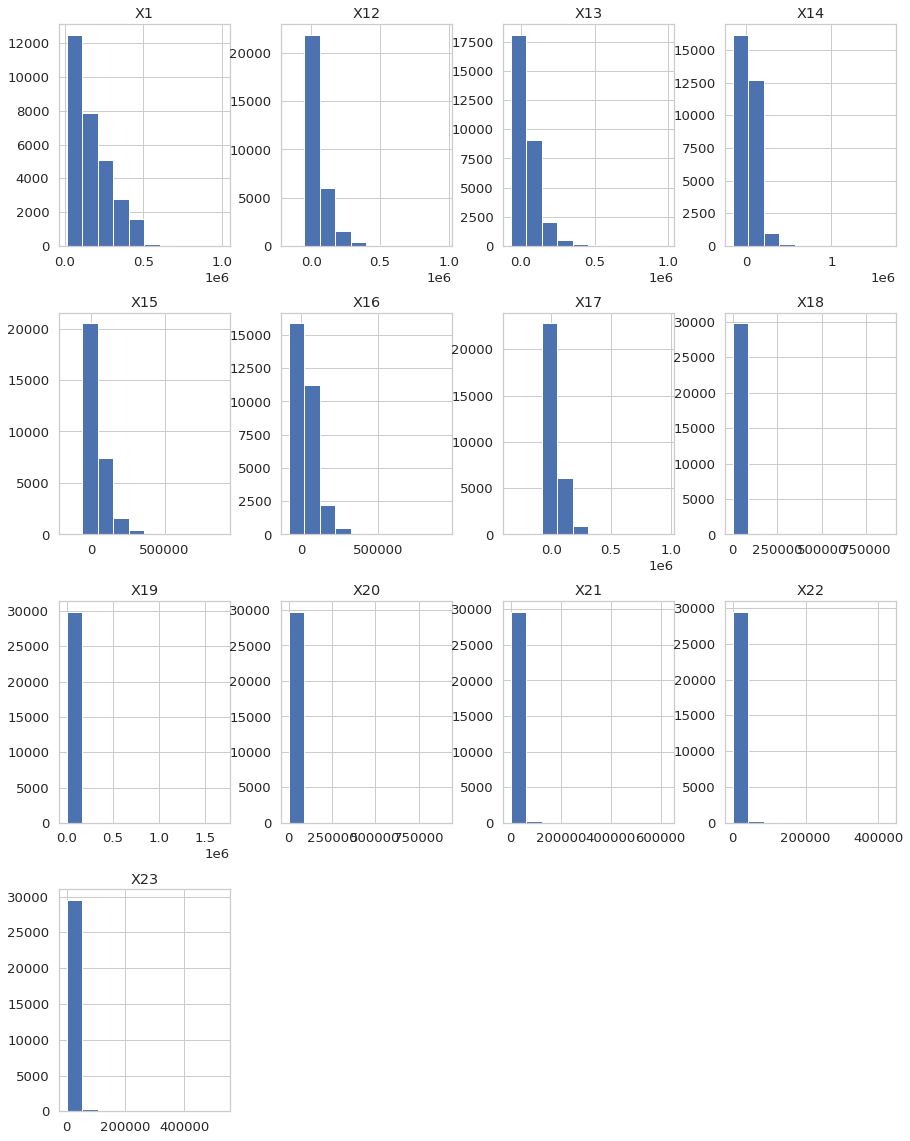

In [51]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
ndf.hist(ax=ax)
plt.show()

## 6) Escala los datos, si consideras necesario

In [53]:
scaled = minmax_scale(ndf.dropna(axis=0))

## 7) Reduce las dimensiones con PCA, si consideras necesario.

In [58]:
pcs = PCA()
pcs.fit(scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['Principal Component {}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(3) 

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
Standard deviation,0.152,0.111,0.037,0.034,0.032,0.025,0.021,0.019,0.016,0.012,0.010,0.009,0.006
Proportion of variance,0.565,0.299,0.033,0.028,0.025,0.015,0.011,0.009,0.006,0.004,0.003,0.002,0.001
Cumulative proportion,0.565,0.865,0.898,0.926,0.951,0.966,0.976,0.985,0.991,0.995,0.997,0.999,1.000


### Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

### Indica la importancia de las variables en cada componente

In [55]:
#pcs = PCA()
#pcs.fit(X.iloc[:, 1:].dropna(axis=0))
#pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             #'Proportion of variance': pcs.explained_variance_ratio_,
                             #'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             #})
#pcsSummary_df = pcsSummary_df.transpose()
#pcsSummary_df.columns = ['Principal Component {}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
#pcsSummary_df.round(3) 

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Principal Component 21,Principal Component 22,Principal Component 23
Standard deviation,166585.075,115824.702,37256.817,27747.103,20698.682,20278.007,18520.702,17040.235,16294.110,11615.225,...,9.118,2.063,0.939,0.753,0.731,0.596,0.512,0.494,0.459,0.419
Proportion of variance,0.611,0.295,0.031,0.017,0.009,0.009,0.008,0.006,0.006,0.003,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cumulative proportion,0.611,0.906,0.936,0.953,0.963,0.972,0.979,0.986,0.991,0.994,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## 8) Elabora los histogramas de los atributos para visualizar su distribución

## 9) Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

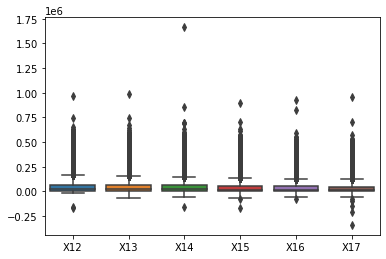

In [16]:
sns.boxplot(data=X[['X12',
    'X13',
    'X14',
    'X15',
    'X16',
    'X17',]], orient="v")

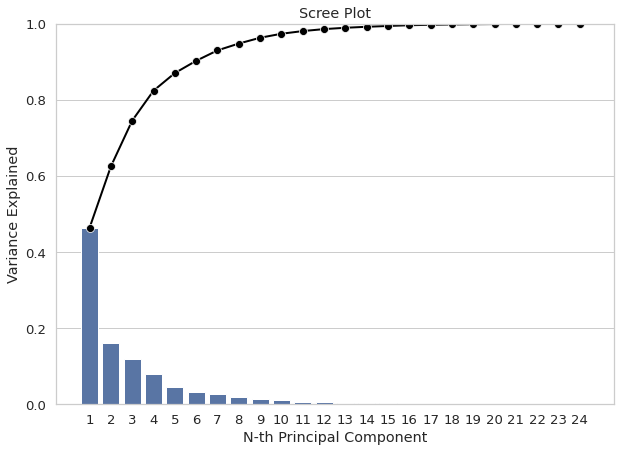

In [30]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## 10) Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.